In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
image_size = (48, 48)

train=tf.keras.utils.image_dataset_from_directory("train", batch_size=32, image_size=image_size,seed=10)
test=tf.keras.utils.image_dataset_from_directory("test", batch_size=32, image_size=image_size,seed=10)

class_names=train.class_names

print(class_names)

Found 24278 files belonging to 5 classes.
Found 5998 files belonging to 5 classes.
['angry', 'fearful', 'happy', 'sad', 'surprised']


In [ ]:
train_dataset = train.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.8 and logs.get('accuracy')>0.8):
      print("\nvalidation accuracy is > 80%!")
      self.model.stop_training = True

callback = Callback()

In [ ]:
X_SIZE = image_size[0]
Y_SIZE = image_size[1]
NUM_OF_CLASSES = len(class_names)

callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model = tf.keras.models.Sequential([
     tf.keras.applications.vgg16.VGG16(include_top=False, pooling='max', weights="imagenet", input_shape= (X_SIZE,Y_SIZE,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(NUM_OF_CLASSES, activation='softmax')
  ])

model.layers[0].trainable = True

model.compile(  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 2048)              1050624   
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1024)              2098176   
                                                      

In [ ]:
history = model.fit(train_dataset,batch_size = 10, epochs=100, validation_data=valid_dataset, callbacks=[callback,callback2])

Epoch 1/100
759/759 [==============================] - 27s 34ms/step - loss: 1.8552 - accuracy: 0.2468 - val_loss: 35.5399 - val_accuracy: 0.2077
Epoch 2/100
759/759 [==============================] - 26s 34ms/step - loss: 1.5038 - accuracy: 0.3598 - val_loss: 1.8384 - val_accuracy: 0.3508
Epoch 3/100
759/759 [==============================] - 26s 34ms/step - loss: 1.2678 - accuracy: 0.4587 - val_loss: 1.9763 - val_accuracy: 0.4105
Epoch 4/100
759/759 [==============================] - 26s 34ms/step - loss: 1.1636 - accuracy: 0.4972 - val_loss: 1.3533 - val_accuracy: 0.4318
Epoch 5/100
759/759 [==============================] - 26s 34ms/step - loss: 1.0954 - accuracy: 0.5267 - val_loss: 15.3159 - val_accuracy: 0.5365
Epoch 6/100
759/759 [==============================] - 26s 34ms/step - loss: 1.0342 - accuracy: 0.5548 - val_loss: 1.0450 - val_accuracy: 0.5378
Epoch 7/100
759/759 [==============================] - 26s 34ms/step - loss: 0.9942 - accuracy: 0.5787 - val_loss: 1.0623 - val_

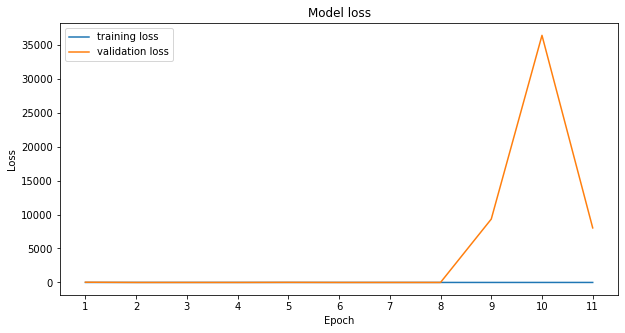

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))
plt.legend()
plt.show()

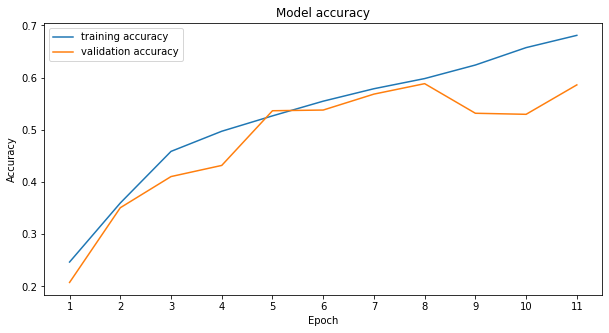

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label = "training accuracy")
plt.plot(history.history['val_accuracy'], label = "validation accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(len(history.history['accuracy'])), np.arange(1, len(history.history['accuracy'])+1))
plt.legend()
plt.show()